# Uma equação "stiff"

Nesta notebook vamos comparar o desempenho de diferentes esquemas numéricos quando aplicados ao PVI 
$$y'= \lambda(y-\cos x) - \text{sen } x,\quad y(0) = 1.$$

A solução deste problema é $\varphi(x) = \cos x$, que independe do valor de $\lambda$. No entanto, se começarmos com uma outra condição inicial $y(0) = 1+\varepsilon$, obteremos a nova solução

$$y(x) = \varepsilon e^{\lambda x} +\cos x.$$

Nas figuras a seguir mostramos várias destas soluções para os valores $\lambda = -1$ e $\lambda = -10$. 


In [1]:
#NumPy é a principal biblioteca para cálculos científicos de Python. Ela disponibiliza o objeto multidimensional 
#arranjo, objetos derivados, e um conjuntos de rotinas para operações rápidas sobre arranjos.
import numpy as np
#SymPy é uma biblioteca para cálculos simbólicos como integração exata, derivação, 
#resolução de equações, expansão em série de Taylor, etc
import sympy as sp 
#pandas é uma ferramenta de código aberto construída sobre Python para análise e manipulação de dados 
import pandas as pd
#Para mostrar tabelas mais bonitas
from IPython.display import HTML
#Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1 Visualização da solução exata

In [2]:
def phi(a):
    """    
    epsilon, l=lambda: parâmetros"    
    phi: solução exata da equação com y(0)= 1 + epsilon
    """     
    return epsilon*np.exp(l*a)+np.cos(a)

### Gráficos de algumas soluções

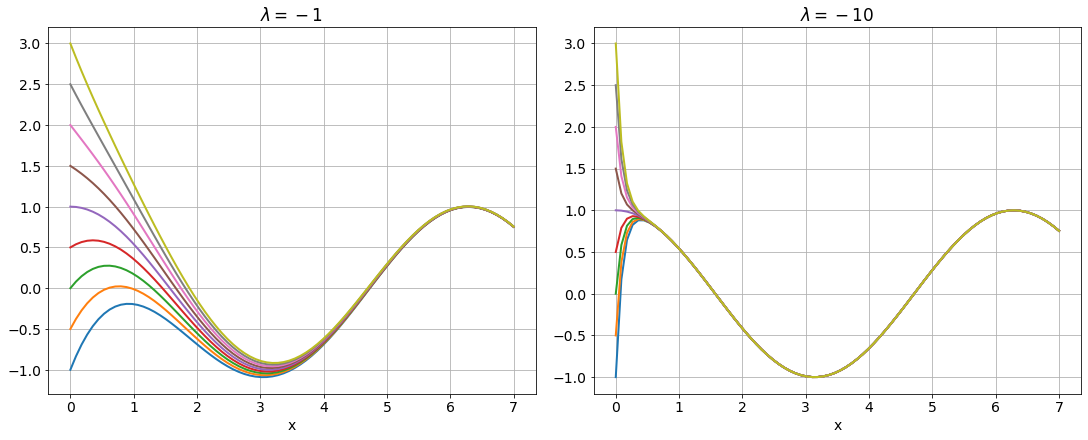

In [3]:
# Tamanho da letra nas figuras do Matplotlib.
plt.rcParams['font.size'] = 14
# Plotagem da solução exata junto com as três aproximações obtidas.
# Tamanho da figura e janelas
figsize = (15, 6)
colunas = 2
linhas = 1
#lambda = -1
l = -1
#alguns valores de epsilon
vec_epsilon = np.linspace(-2, 2, 9)
# x para plotar a sol. exata
x = np.linspace(0, 7, 80)
#figura
fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)
#fig.suptitle(r'Algums gráficos de $y(x) = \varepsilon e^{\lambda x} +\cos x$')
#axs[0].set_ylabel(r'$\varphi$ e $y_h$')
axs[0].set_title(r'$\lambda = -1$')
axs[0].set_xlabel('x') 
axs[0].grid(True)
for epsilon in vec_epsilon:
    axs[0].plot(x, phi(x), linestyle='-', linewidth=2) 
axs[1].set_title(r'$\lambda = -10$')
l = -10
axs[1].set_xlabel('x') 
axs[1].grid(True)
for epsilon in vec_epsilon:
    axs[1].plot(x, phi(x), linestyle='-', linewidth=2)  

### Campos de direções

In [4]:
# Função no membro direito da equação
def f(a, b):
    return l*(b-np.cos(a)) - np.sin(a)

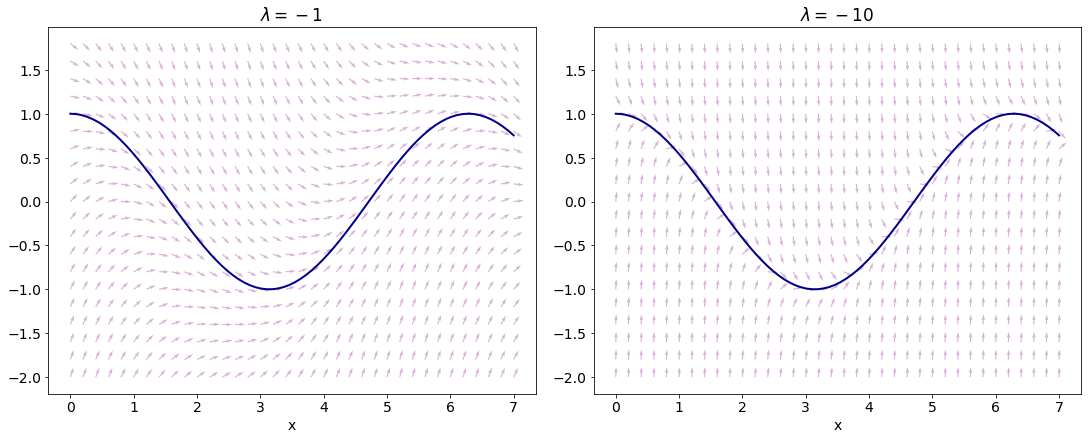

In [5]:
epsilon = 0
# Tamanho da letra nas figuras do Matplotlib.
plt.rcParams['font.size'] = 14
# Plotagem da solução exata junto com as três aproximações obtidas.
# Tamanho da figura e janelas
figsize = (15, 6)
colunas = 2
linhas = 1
#lambda = -1
l = -1
# x para plotar a sol. exata
x = np.linspace(0, 7, 80)
#figura
fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)
#fig.suptitle('Campos de direções')
#axs[0].set_ylabel(r'$\varphi$ e $y_h$')
axs[0].set_title(r'$\lambda = -1$')
axs[0].set_xlabel('x') 
#campo de direções com lambda = -1
x_field = np.arange(0,7.2,0.2)
y_field = np.arange(-2,2.0,0.2)
X, Y = np.meshgrid(x_field, y_field)
u = 1/np.sqrt(1+(f(X,Y))**2)
v = f(X,Y)/np.sqrt(1+(f(X,Y))**2)
n = -2
color = np.sqrt(((v-n)/2)**2 + ((u-n)/2)**2)
#color = abs(v)
axs[0].quiver(X,Y,u,v,color = 'purple', alpha=0.3)
axs[0].plot(x, phi(x), color = 'darkblue', linestyle='-', linewidth=2) 
axs[1].set_title(r'$\lambda = -10$')
#lambda = -10
l = -10
axs[1].set_xlabel('x') 
#campo de direções de lambda = -10
x_field = np.arange(0,7.2,0.2)
y_field = np.arange(-2,2.0,0.2)
X, Y = np.meshgrid(x_field, y_field)
u = 1/np.sqrt(1+(f(X,Y))**2)
v = f(X,Y)/np.sqrt(1+(f(X,Y))**2)
n = -2
#color = np.sqrt(((v-n)/2)**2 + ((u-n)/2)**2)
color = 5*abs(v)
axs[1].quiver(X,Y,u,v,color = 'purple', alpha=0.3)
axs[1].plot(x, phi(x), color = 'darkblue', linestyle='-', linewidth=2) 


## 1.2 Implementação de RK4 e AB/AM de ordem 4

In [6]:
# Condições iniciais
x0 = 0
y0 = 1
# Extremo direito do intervalo
X = 7

In [7]:
#Passo do Método RK4
def passo_RK4(x, y, f, h):
    """
    Executa uma iteração do método RK4.
    
    Parâmetros
    ----------
    x : ponto da malha correspondente a y
    y : float.
        Aproximação da solução no ponto anterior.
    f : function
        Função para avaliar o termo direito do sistema.
    h : float
        Passo.
    
    Retorna
    -------
    y_novo : float
             Aproximação da solução no ponto anterior.
    """
    k1 = f(x,y)
    k2 = f(x+h/2,y + h*k1/2)
    k3 = f(x+h/2,y + h*k2/2)
    k4 = f(x+h,y + h*k3)
    y_novo = y + h * (k1+2*k2+2*k3+k4)/6
    return y_novo 

#Passo do Método AB/AM ordem 4
def passo_AB4_AM4(x, y, f_, f, h):
    """
    Executa uma iteração do método AB4_AM44.
    
    Parâmetros
    ----------
    y : float.
        Aproximação da solução no ponto anterior.
    x : ponto da malha correspondente a y    
    f : function
        Função para avaliar o termo direito do sistema.
    h : float
        Passo.
    f_ : numpy array com f(xj,yj), f(x_{j-1},y_{j-1}), f(x_{j-2},y_{j-2}) e f(x_{j-3},y_{j-3}),
    nessa ordem
    
    Retorna
    -------
    y_novo : float
             Aproximação da solução no ponto anterior.
    """
    #AB 4 passos
    y_pred = y + h*(55*f_[0] - 59 * f_[1] +37 * f_[2] - 9 * f_[3])/24
    #AM 3 passos
    y_corr1 = y + h*(9*f(x+h,y_pred) + 19 * f_[0] - 5*f_[1] + f_[2])/24
    y_corr2 = y + h*(9*f(x+h,y_corr1) + 19 * f_[0] - 5*f_[1] + f_[2])/24
    #atualizar valores de f
    f_ = np.roll(f_, 1)
    f_[0] = f(x+h,y_corr2)
    return y_corr2,f_

In [8]:
l=-50
# Consideramos 3 tamanhos de passo possíveis
lista_h = [0.2, 0.1, 0.05, 0.01, 0.005, 0.001]
# Lista com as malhas
lista_x = []
# Dicionario com as soluções aproximadas para cada malha e para cada método
lista_y = {'RK4': [],'AB4_AM4': []}
# Dicionario com os erros absolutos de cada malha
erros_abs = {'RK4': [],'AB4_AM4': []}
#Aplicamos os dois métodos
for h in lista_h:
    N = int((X-x0) / h)   # quantidade de passos
    x = np.linspace(x0, X, num=N+1)  # malha 
    y_RK4 = np.empty_like(x) #inicializar z
    y_AB4_AM4 = np.empty_like(x) #inicializar z
    y_RK4[0] = y0 #y inicial
    y_RK4[1] = passo_RK4(x0, y0, f, h) #y1 
    y_RK4[2] = passo_RK4(x0+h, y_RK4[1], f, h) #y2 
    y_RK4[3] = passo_RK4(x0+2*h, y_RK4[2], f, h) #y3
    y_AB4_AM4[0] = y0 #y inicial
    y_AB4_AM4[1] = y_RK4[1] #y1 inicializar com RK4
    y_AB4_AM4[2] = y_RK4[2] #y2 inicializar com RK4
    y_AB4_AM4[3] = y_RK4[3] #y3 inicializar com RK4    
    #tres primeiros valores de f
    f_ = np.array([f(x0+3*h,y_AB4_AM4[3]),f(x0+2*h,y_AB4_AM4[2]),f(x0+h,y_AB4_AM4[1]),f(x0,y0)])
    # N iterações dos três métodos.
    for n in range(3,N):
        y_RK4[n + 1] = passo_RK4(x[n],y_RK4[n],f,h) #iteração do método RK4
        y_AB4_AM4[n +1],f_ = passo_AB4_AM4(x[n],y_AB4_AM4[n],f_,f,h)#iteração do método AB4/AM4
    lista_x.append(x) #armazenar malha 
    lista_y['RK4'].append(y_RK4)  # armazenar arranjo com as aproximações de RK4
    lista_y['AB4_AM4'].append(y_AB4_AM4)  # armazenar arranjo com as aproximações de AB4_AM4
    erros_abs['RK4']. append(phi(x)-y_RK4) # armazenar erro global das aproximações de RK4 
    erros_abs['AB4_AM4']. append(phi(x)-y_AB4_AM4) # armazenar erro global das aproximações de AB4_AM4

## 1.3 Visualização dos resultados

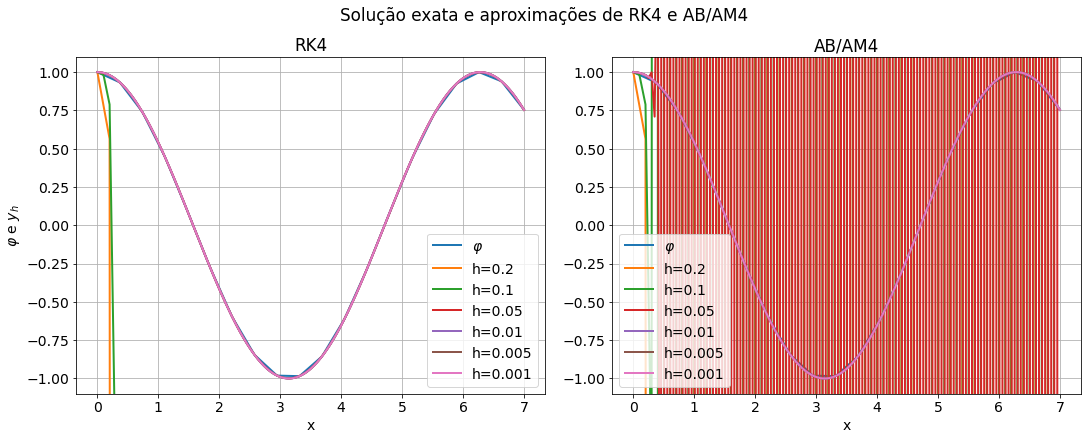

In [9]:
# Tamanho da letra nas figuras do Matplotlib.
plt.rcParams['font.size'] = 14
# Plotagem da solução exata junto com as duas aproximações obtidas.
# Tamanho da figura e janelas
figsize = (15, 6)
colunas = 2
linhas = 1
# x para plotar a sol. exata
x1 = np.linspace(x0, X, 20)
epsilon=0
y1 = phi(x1)
#figura
fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)
fig.suptitle('Solução exata e aproximações de RK4 e AB/AM4')
axs[0].set_ylabel(r'$\varphi$ e $y_h$')
axs[0].set_title('RK4')
axs[0].set_xlabel('x') 
axs[0].grid(True)
axs[0].set_ylim((-1.1, 1.1))
axs[0].plot(x1, phi(x1), label=r'$\varphi$', color = 'C0', linestyle='-', linewidth=2) 
for j in range(len(lista_h)): 
    axs[0].plot(lista_x[j], lista_y['RK4'][j], label='h='+str(lista_h[j]), \
        color = 'C'+str(j+1), linestyle='-', linewidth=2)  
axs[0].legend()
axs[1].set_title('AB/AM4')
axs[1].set_xlabel('x') 
axs[1].grid(True)
axs[1].set_ylim((-1.1, 1.1))
axs[1].plot(x1, phi(x1), label=r'$\varphi$', color = 'C0', linestyle='-', linewidth=2) 
for j in range(len(lista_h)): 
    axs[1].plot(lista_x[j], lista_y['AB4_AM4'][j], label='h='+str(lista_h[j]), \
        color = 'C'+str(j+1), linestyle='-', linewidth=2) 
axs[1].legend()

[]

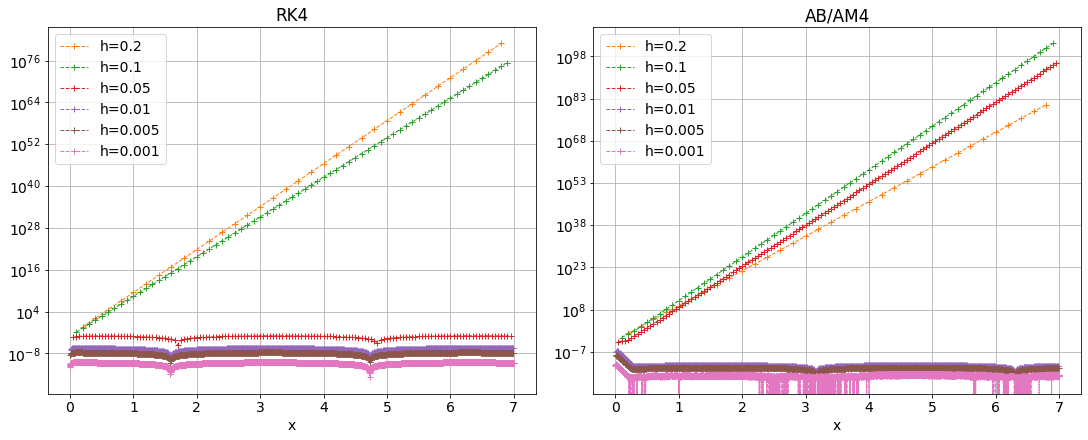

In [10]:
# Plotagem dos erros das aproximações obtidas na escala logarítmica.
#figura
fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)
#fig.suptitle('Erros absolutos na escala logarítmica')
#axs[0].set_ylabel(r'$\varphi$ e $y_h$')
axs[0].set_title('RK4')
axs[0].set_xlabel('x') 
axs[0].grid(True)
#axs[0].set_ylim((-1.1, 1.1)) 
for j in range(len(lista_h)): 
    axs[0].plot(lista_x[j][1:-1], abs(erros_abs['RK4'][j][1:-1]), \
             label='h='+str(lista_h[j]), color = 'C'+str(j+1), marker='+', linewidth=1, linestyle='--')  
axs[0].legend()
axs[0].semilogy()
axs[1].set_title('AB/AM4')
axs[1].set_xlabel('x') 
axs[1].grid(True)
#axs[1].set_ylim((-1.1, 1.1))
#axs[1].plot(x1, phi(x1), label=r'$\varphi$', color = 'C0', linestyle='-', linewidth=2) 
for j in range(len(lista_h)): 
    axs[1].plot(lista_x[j][1:-1], abs(erros_abs['AB4_AM4'][j][1:-1]), \
             label='h='+str(lista_h[j]), color = 'C'+str(j+1), marker='+', linewidth=1, linestyle='--')  
axs[1].legend()
axs[1].semilogy()

## 2. Comparação RK4, ABM4 e BDF4

In [11]:
#Passo do Método BDF4
def passo_BDF4(x_novo, y_, h):
    """
    Executa uma iteração do método BDF4.
    
    Parâmetros
    ----------
    x_novo : ponto da malha correspondente ao y_novo    
    h : float
        Passo.
    y_ : numpy array com yj, y_{j-1} ,y_{j-2} e y_{j-3}), nessa ordem
    
    Retorna
    -------
    y_ : numpy array com y_{j+1}, y_{j} ,y_{j-1} e y_{j-2}, nessa ordem
    """   
    y_novo = (48*y_[0] - 36* y_[1] +16* y_[2] -3*y_[3] -12 * (h*l) *np.cos(x_novo) -12*h*np.sin(x_novo))/(25-12*(h*l))
    #atualizar valores de y_
    y_ = np.roll(y_, 1)
    y_[0] = y_novo
    return y_

In [12]:
#Implementação de BDF4
# Consideramos 3 tamanhos de passo possíveis
#lista_h = [0.2, 0.1, 0.05, 0.01, 0.005, 0.001]
# Lista com as malhas
#lista_x = []
# Acrescentar BDF4 ao dicionário lista_y
lista_y['BDF4'] = []
# Acrescentar BDF4 ao dicionário erros_abs
erros_abs['BDF4'] = []
#Aplicar o método
for h in lista_h:
    N = int((X-x0) / h)   # quantidade de passos
    x = np.linspace(x0, X, num=N+1)  # malha 
    y_BDF4 = np.empty_like(x) #inicializar z   
    y_BDF4[0] = y0 #y inicial
    y_BDF4[1] = (y0-(h*l)*np.cos(x[1])-h*np.sin(x[1]))/(1-h*l) #y1 inicializar com BDF1
    y_BDF4[2] = (4*y_BDF4[1]-y0-2*(h*l)*np.cos(x[2])-2*h*np.sin(x[2]))/(3-2*(h*l)) #y2 inicializar com BDF2
    y_BDF4[3] = (18*y_BDF4[2] - 9*y_BDF4[1]+2*y0-6*(h*l)*np.cos(x[3])-6*h*np.sin(x[3]))/(11-6*(h*l)) #y3 inicializar com BDF3    
    #tres primeiros valores de y
    y_ = np.array([y_BDF4[3],y_BDF4[2],y_BDF4[1],y_BDF4[0]])
    # N iterações dos três métodos.
    for n in range(3,N):
        y_ = passo_BDF4(x[n+1],y_,h) #iteração do método BDF4
        y_BDF4[n + 1] = y_[0]
    lista_y['BDF4'].append(y_BDF4)  # armazenar arranjo com as aproximações de BDF4
    erros_abs['BDF4']. append(phi(x)-y_BDF4) # armazenar erro global das aproximações de BDF4

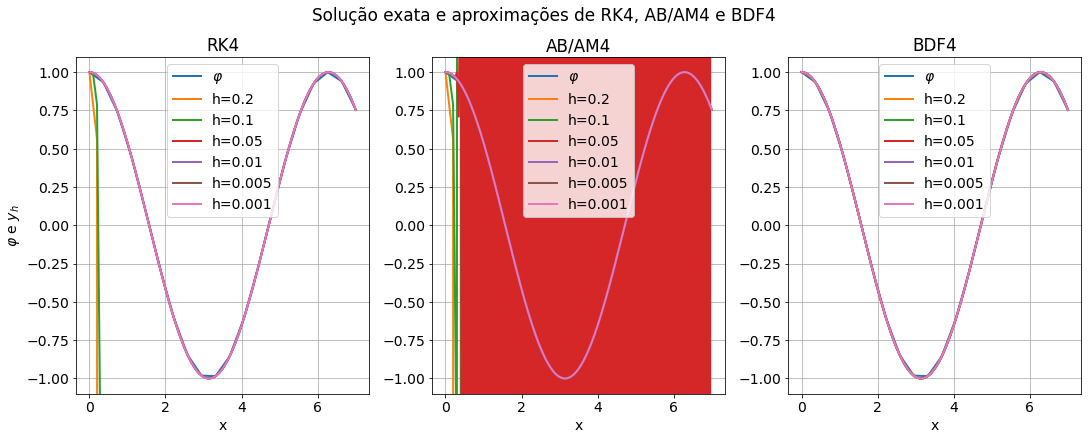

In [13]:
# Tamanho da letra nas figuras do Matplotlib.
plt.rcParams['font.size'] = 14
# Plotagem da solução exata junto com as duas aproximações obtidas.
# Tamanho da figura e janelas
figsize = (15, 6)
colunas = 3
linhas = 1
# x para plotar a sol. exata
x1 = np.linspace(x0, X, 20)
epsilon=0
y1 = phi(x1)
#figura
fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)
fig.suptitle('Solução exata e aproximações de RK4, AB/AM4 e BDF4')
axs[0].set_ylabel(r'$\varphi$ e $y_h$')
axs[0].set_title('RK4')
axs[0].set_xlabel('x') 
axs[0].grid(True)
axs[0].set_ylim((-1.1, 1.1))
axs[0].plot(x1, phi(x1), label=r'$\varphi$', color = 'C0', linestyle='-', linewidth=2) 
for j in range(len(lista_h)): 
    axs[0].plot(lista_x[j], lista_y['RK4'][j], label='h='+str(lista_h[j]), \
        color = 'C'+str(j+1), linestyle='-', linewidth=2)  
axs[0].legend()
axs[1].set_title('AB/AM4')
axs[1].set_xlabel('x') 
axs[1].grid(True)
axs[1].set_ylim((-1.1, 1.1))
axs[1].plot(x1, phi(x1), label=r'$\varphi$', color = 'C0', linestyle='-', linewidth=2) 
for j in range(len(lista_h)): 
    axs[1].plot(lista_x[j], lista_y['AB4_AM4'][j], label='h='+str(lista_h[j]), \
        color = 'C'+str(j+1), linestyle='-', linewidth=2) 
axs[1].legend()
axs[2].set_title('BDF4')
axs[2].set_xlabel('x') 
axs[2].grid(True)
axs[2].set_ylim((-1.1, 1.1))
axs[2].plot(x1, phi(x1), label=r'$\varphi$', color = 'C0', linestyle='-', linewidth=2) 
for j in range(len(lista_h)): 
    axs[2].plot(lista_x[j], lista_y['BDF4'][j], label='h='+str(lista_h[j]), \
        color = 'C'+str(j+1), linestyle='-', linewidth=2) 
axs[2].legend()

[]

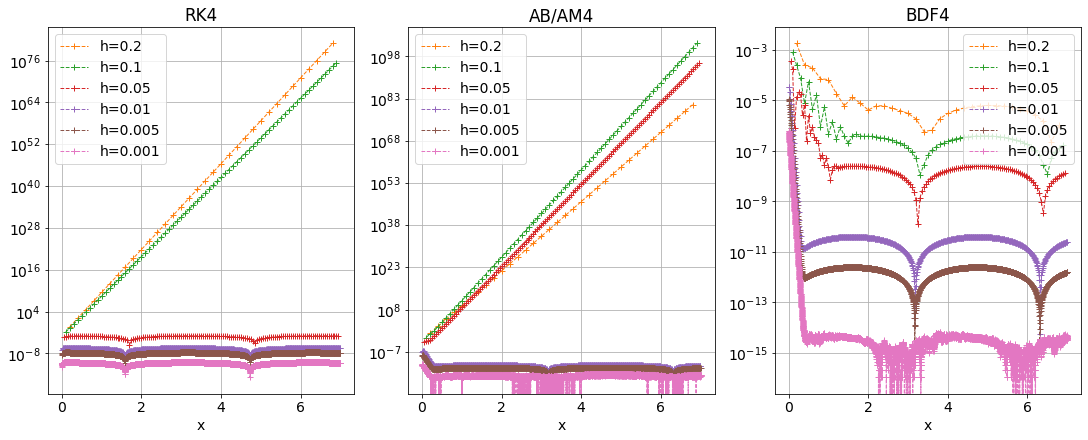

In [14]:
# Plotagem dos erros das aproximações obtidas na escala logarítmica.
#figura
fig, axs = plt.subplots(linhas, colunas, figsize=figsize, constrained_layout=True)
#fig.suptitle('Erros absolutos na escala logarítmica')
#axs[0].set_ylabel(r'$\varphi$ e $y_h$')
axs[0].set_title('RK4')
axs[0].set_xlabel('x') 
axs[0].grid(True)
#axs[0].set_ylim((-1.1, 1.1)) 
for j in range(len(lista_h)): 
    axs[0].plot(lista_x[j][1:-1], abs(erros_abs['RK4'][j][1:-1]), \
             label='h='+str(lista_h[j]), color = 'C'+str(j+1), marker='+', linewidth=1, linestyle='--')  
axs[0].legend()
axs[0].semilogy()
axs[1].set_title('AB/AM4')
axs[1].set_xlabel('x') 
axs[1].grid(True)
#axs[1].set_ylim((-1.1, 1.1))
#axs[1].plot(x1, phi(x1), label=r'$\varphi$', color = 'C0', linestyle='-', linewidth=2) 
for j in range(len(lista_h)): 
    axs[1].plot(lista_x[j][1:-1], abs(erros_abs['AB4_AM4'][j][1:-1]), \
             label='h='+str(lista_h[j]), color = 'C'+str(j+1), marker='+', linewidth=1, linestyle='--')  
axs[1].legend()
axs[1].semilogy()
axs[2].set_title('BDF4')
axs[2].set_xlabel('x') 
axs[2].grid(True) 
for j in range(len(lista_h)): 
    axs[2].plot(lista_x[j][1:-1], abs(erros_abs['BDF4'][j][1:-1]), \
             label='h='+str(lista_h[j]), color = 'C'+str(j+1), marker='+', linewidth=1, linestyle='--')  
axs[2].legend()
axs[2].semilogy()